Importing modules

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score,r2_score
%matplotlib inline

Loading IMDB Movies India dataset

In [5]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [12]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [13]:
df.dropna(inplace=True)
df.isna().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [14]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


Exploring dataset and performing Feature Engineering

In [15]:
df['Votes'] = df['Votes'].str.replace(',','').astype('int')
df['Year'] = df['Year'].str.strip('()').astype(int)
df['Duration'] = df['Duration'].str.strip('min')


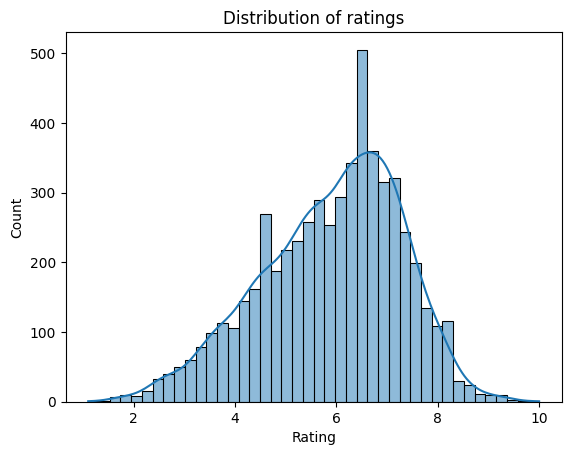

In [16]:
sns.histplot(data=df,x='Rating',kde=True)
plt.title('Distribution of ratings')
plt.show()

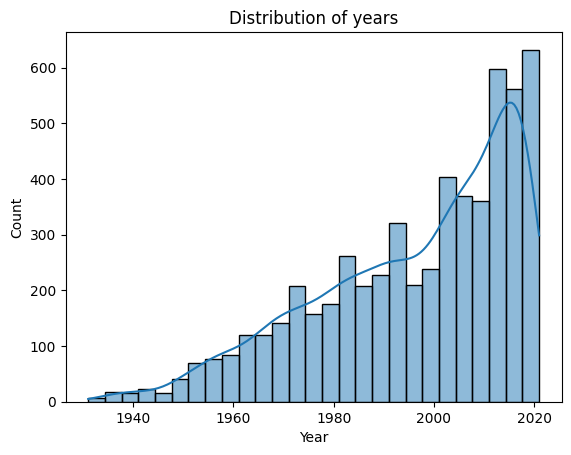

In [17]:
sns.histplot(data=df,x='Year',kde=True)
plt.title('Distribution of years')
plt.show()

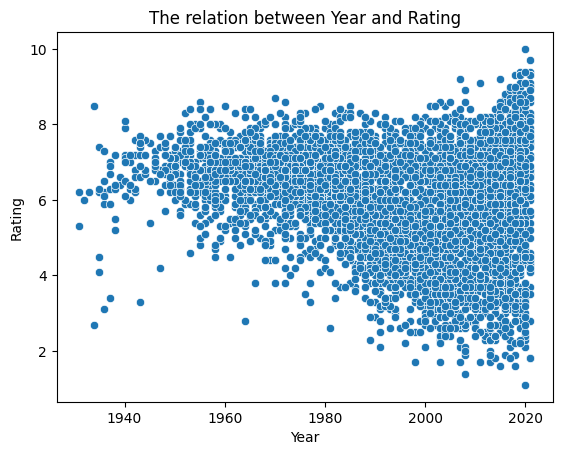

In [19]:
sns.scatterplot(data=df,x='Year',y='Rating')
plt.title("The relation between Year and Rating")
plt.show()

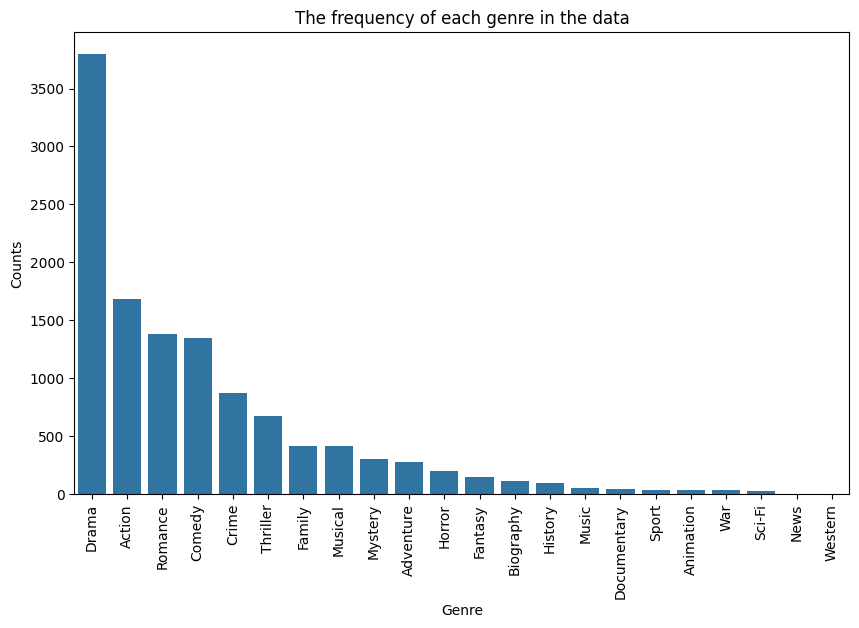

In [20]:
movies_genre = df['Genre'].str.split(', ',expand=True).stack().value_counts()
labels = movies_genre.keys()
count = movies_genre.values
plt.figure(figsize=(10,6))
sns.barplot(x=labels,y=count)
plt.xticks(rotation=90)
plt.title('The frequency of each genre in the data')
plt.xlabel('Genre')
plt.ylabel('Counts')
plt.show()

In [21]:
top_10=df[["Name","Genre","Rating"]].sort_values(by="Rating",ascending=False).head(10)
print("TOP_10 based on ratings")
top_10

TOP_10 based on ratings


,Name,Genre,Rating
8339,Love Qubool Hai,"Drama, Romance",10.0
5410,Half Songs,"Music, Romance",9.7
6852,June,Drama,9.4
14222,The Reluctant Crime,Drama,9.4
5077,Gho Gho Rani,"History, Romance",9.4
1314,Ashok Vatika,Drama,9.3
13231,Sindhustan,"Documentary, Family, History",9.3
8344,Love Sorries,"Comedy, Drama, Romance",9.3
12673,Secrets of Sinauli,"Documentary, History",9.3
11843,Refl3ct,Sci-Fi,9.3


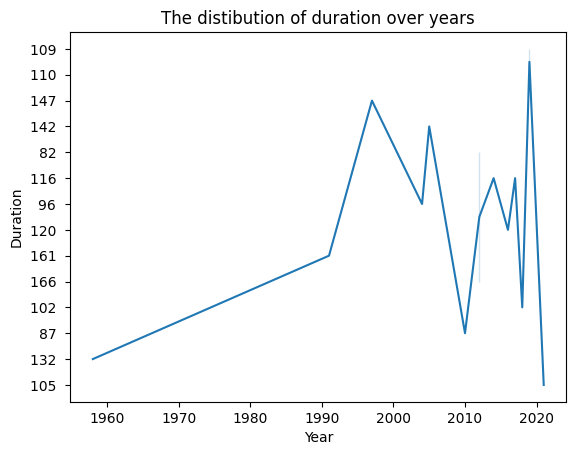

In [22]:
sns.lineplot(data=df.head(15),x='Year',y='Duration')
plt.title('The distibution of duration over years')
plt.show()

In [25]:
encoder = LabelEncoder()
df['Actor 1'] = encoder.fit_transform(df['Actor 1'])
df['Actor 2'] = encoder.fit_transform(df['Actor 2'])
df['Actor 3'] = encoder.fit_transform(df['Actor 3'])
df['Genre'] = encoder.fit_transform(df['Genre'])
df['Director'] = encoder.fit_transform(df['Director'])
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


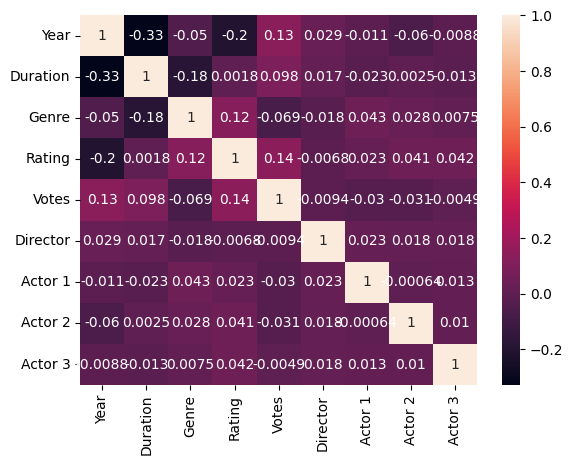

In [26]:
df2 = df.drop('Name',axis=1)
sns.heatmap(df2.corr(),annot=True)
plt.show()

Building the model

In [27]:
X = df2.drop('Rating',axis=1)
y= df2['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
model1 = LinearRegression()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
y_pred
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {mean_squared_error(y_test,y_pred)}")
print(f"R2 score : {r2_score(y_test,y_pred)}")

Mean Absolute Error : 1.0355603579570465
Mean Squared Error : 1.6737798290839632
R2 score : 0.08633120473998979


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# Train and evaluate the models
metrics = {'Model': [], 'MAE': [], 'MSE': [], 'R²': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics['Model'].append(name)
    metrics['MAE'].append(mean_absolute_error(y_test, y_pred))
    metrics['MSE'].append(mean_squared_error(y_test, y_pred))
    metrics['R²'].append(r2_score(y_test, y_pred))

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(metrics)

# Display the metrics
print(metrics_df)


                         Model       MAE       MSE        R²
0            Linear Regression  1.035560  1.673780  0.086331
1      Decision Tree Regressor  1.215607  2.585883 -0.411560
2      Random Forest Regressor  0.844455  1.238749  0.323802
3  Gradient Boosting Regressor  0.840355  1.208933  0.340078


<ipython-input-29-509a65b62937>:25: UserWarning:

FixedFormatter should only be used together with FixedLocator



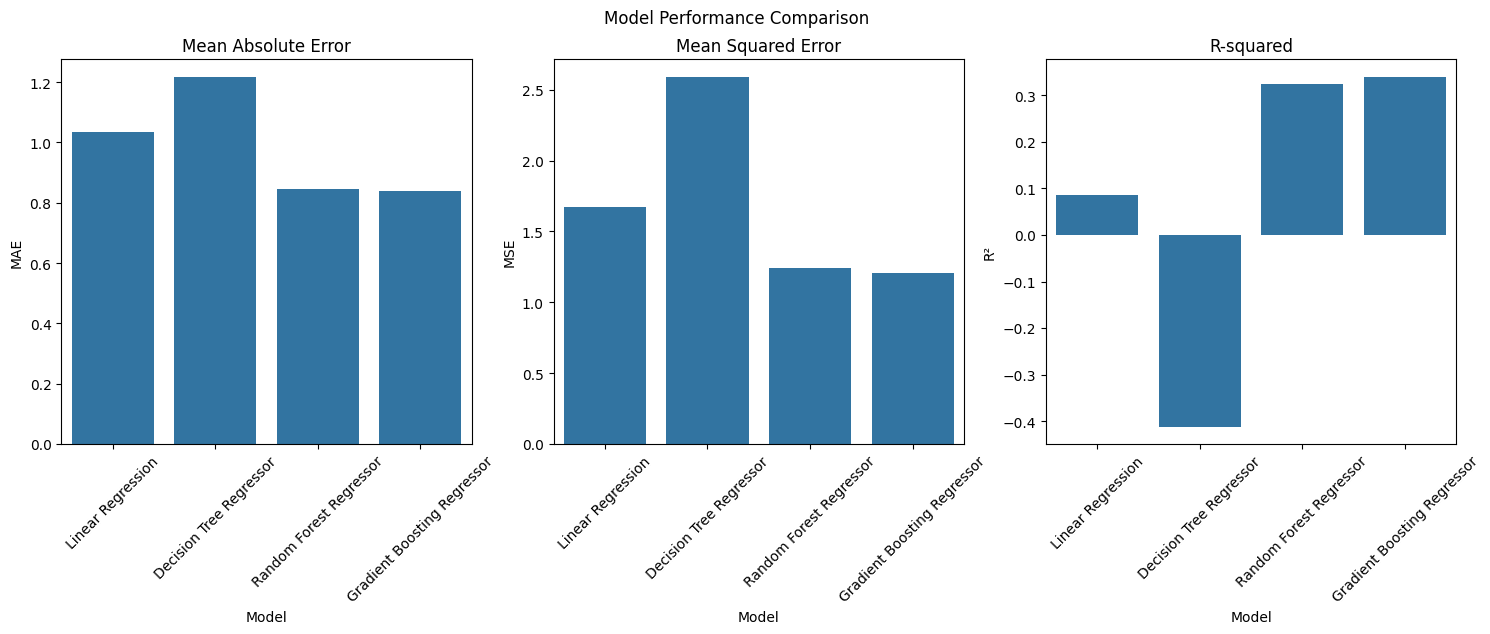

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Model Performance Comparison')

# Mean Absolute Error
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0])
axes[0].set_title('Mean Absolute Error')
axes[0].set_ylabel('MAE')

# Mean Squared Error
sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[1])
axes[1].set_title('Mean Squared Error')
axes[1].set_ylabel('MSE')

# R-squared
sns.barplot(x='Model', y='R²', data=metrics_df, ax=axes[2])
axes[2].set_title('R-squared')
axes[2].set_ylabel('R²')

# Rotate x labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()


Best model is Gradient Boosting REgressor based on evaluation metrics

In [30]:
#best model among linear regression, decision tree regressor, random forest regressor and gradient boosting regressor

model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_pred)}")
print(f"Mean Squared Error : {mean_squared_error(y_test,y_pred)}")
print(f"R2 score : {r2_score(y_test,y_pred)}")

Mean Absolute Error : 0.8403519416866055
Mean Squared Error : 1.2089486095714632
R2 score : 0.3400693445786451


In [31]:
#prediction
X

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,8,629,1352,2272,319
3,2019,110,184,35,1335,1198,719,2148
5,1997,147,157,827,1530,378,75,2045
6,2005,142,289,1086,2044,692,1112,2524
8,2012,82,320,326,135,1934,1175,1013
...,...,...,...,...,...,...,...,...
15493,2015,115,229,408,1223,1861,1801,1615
15494,2001,153,133,1496,2059,763,1619,1184
15503,1989,125,28,44,1793,406,754,1685
15505,1999,129,38,655,1025,112,2164,314


In [34]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,229,7.0,8,629,1352,2272,319
3,#Yaaram,2019,110,184,4.4,35,1335,1198,719,2148
5,...Aur Pyaar Ho Gaya,1997,147,157,4.7,827,1530,378,75,2045
6,...Yahaan,2005,142,289,7.4,1086,2044,692,1112,2524
8,?: A Question Mark,2012,82,320,5.6,326,135,1934,1175,1013


Prediction using sample input data

In [44]:
from sklearn.preprocessing import LabelEncoder
sample_data = {
    'Year': [2021],
    'Duration': [105],
    'Genre': ['Drama'],
    'Votes': [1000],
    'Director': ['Gaurav Bakshi'],
    'Actor 1': ['Prateik'],
    'Actor 2': ['Birbal'],
    'Actor 3': ['Antara Mali']
}
sample_df = pd.DataFrame(sample_data)


In [45]:
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

for feature in categorical_features:
    le = label_encoders[feature]
    sample_df[feature] = sample_df[feature].apply(lambda x: x if x in le.classes_ else None)
    sample_df[feature] = sample_df[feature].fillna(le.classes_[0])
    sample_df[feature] = le.transform(sample_df[feature])

sample_df['Year'] = pd.to_numeric(sample_df['Year'])
sample_df['Duration'] = pd.to_numeric(sample_df['Duration'])
sample_df['Votes'] = pd.to_numeric(sample_df['Votes'])

predicted_rating = model.predict(sample_df)
print(f"Predicted Rating: {predicted_rating[0]}")




Predicted Rating: 6.529708155154136
